In [14]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [6]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print({"the training set data the shape " + str(X_train.shape)})
print({"the training set labels hast the shape " + str(Y_train.shape)})
print({"the testing set data the shape " + str(X_test.shape)})
print({"the testing set labels hast the shape " + str(Y_test.shape)})

{'the training set data the shape (60000, 28, 28)'}
{'the training set labels hast the shape (60000,)'}
{'the testing set data the shape (10000, 28, 28)'}
{'the testing set labels hast the shape (10000,)'}


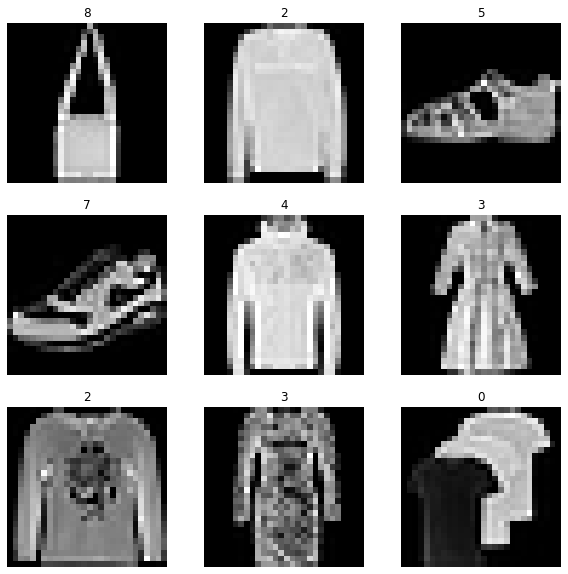

In [17]:
## now we take a look at the data set
sample_img_idx = np.random.randint(0, X_train.shape[0]+1, 9)
plt.figure(figsize=(10,10))
for i, j in enumerate(sample_img_idx):
    image, label = X_train[j], Y_train[j]
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.title(label)
    plt.axis('off')

from above, we can see the X_train are images, with dimensions 28*28, and there are 60000 of the training samples.
in the picture showed above, there are corresponding numbers labeled above the picture, which are the true lables of those picture.
according to the dataset discription:
*0 T-shirt/top
*1 Trouser
*2 Pullover
*3 Dress
*4 Coat
*5 Sandal
*6 Shirt
*7 Sneaker
*8 Bag
*9 Ankle boot

In [18]:
## for image datasets, the most common way to process them is verterising them as matrices
## each emach is a 28*28 matrix in this dataset, and there are 60,000 of them
## Thus, we need to reshape them as 60,000 * (28*28) format as the input features

X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

## for multi-class classification problem, one-hot encoding is the easy way to represent the labels
## define the one-hot fuction
def one_hot(X):
  zeros = np.zeros(shape=(X.shape[0], 10))
  zeros[np.arange(X.size), X] = 1
  return zeros

Y_train = one_hot(Y_train)
Y_test = one_hot(Y_test)

## now we need to normalizing the images as it's important for for the neural netwarks. when we implement MLP, 
## the training process involve backpropogating, which will accumulatively add the gradient
## we need to make sure the weights are proper throughout the trainig process

X_train = ((X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0))
X_test = ((X_test-np.mean(X_test,axis=0))/np.std(X_test,axis=0))

In [19]:
## now we need to further split the training set into trainning set and validation set
## we need validation set in the future when we apply the MLP, we need to find the most proper hyperparameters
## based on the accuracy generated by the validation set

## 3:1 = training : validation
## shuffle the dataset
p = np.random.permutation(X_train.shape[0])

## split
X_val, Y_val = X_train[p[:15000]], Y_train[p[:15000]]
X_train, Y_train = X_train[p[15000:]], Y_train[p[15000:]]